In [4]:
import pandas as pd
from happiness_mining import scoring as hs
from happiness_mining import nlp
from happiness_mining import labMIT1

In [3]:
h_dict = labMIT1.info().to_dict()

In [6]:
path = "../../data/raw/mastodon.csv"
df = pd.read_csv(path)
df = df.loc[df["language"]=="en"]
df['token'] = df['content'].apply(nlp.create_tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/ubuntu/nltk_data'
    - '/home/ubuntu/.venv/nltk_data'
    - '/home/ubuntu/.venv/share/nltk_data'
    - '/home/ubuntu/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


### Sampling

In [4]:
# import random

# words =[]
# count = 0
# index = random.randint(0, 1000)
# for i, row in df.iterrows():
#     words += row["token"]
#     if count == index:
#         sample = row["token"]
#     count += 1

### Set happiness model

In [5]:
model = hs.happiness_score()

### Scoring by text

In [6]:
# model.scoring_by_text(sample)

### Scoring in terms of whole data set

In [7]:
# model.set_whole_words(words)
# model.scoring_in_whole(sample)

### Happiness Distribution


In [8]:
h_text = []
h_whole = []
words = []

for i, row in df.iterrows():
    words += row["token"]
    h_text.append(model.scoring_by_text(row["token"]))

model.set_whole_words(words)
for i, row in df.iterrows():
    h_whole.append(model.scoring_in_whole(row["token"]))

In [9]:
import matplotlib.pyplot as plt

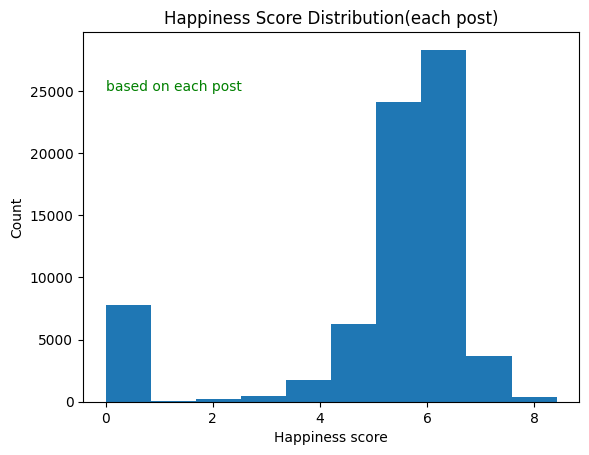

In [33]:
plt.hist(h_text)
plt.title("Happiness Score Distribution(each post)")
plt.text(0, 25000, "based on each post", color="green")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

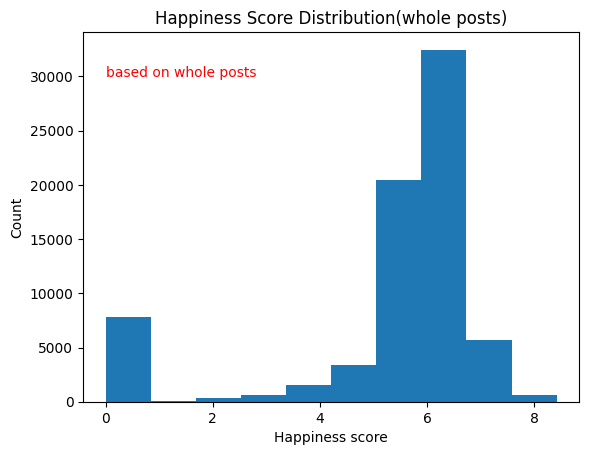

In [32]:
plt.hist(h_whole)
plt.title("Happiness Score Distribution(whole posts)")
plt.text(0, 30000, "based on whole posts", color="red")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

In [28]:
diff = []
for i, j in zip(h_text, h_whole):
    if i != 0 and j != 0:
     diff.append(i-j)

The difference of happiness score between by posts and by whole is between -1 and 1.

(array([1.4000e+01, 1.5800e+02, 9.1000e+02, 4.7350e+03, 2.0342e+04,
        3.5623e+04, 2.8930e+03, 4.5800e+02, 1.0400e+02, 1.1000e+01]),
 array([-2.91300489, -2.36312003, -1.81323517, -1.26335032, -0.71346546,
        -0.1635806 ,  0.38630426,  0.93618912,  1.48607398,  2.03595884,
         2.58584369]),
 <BarContainer object of 10 artists>)

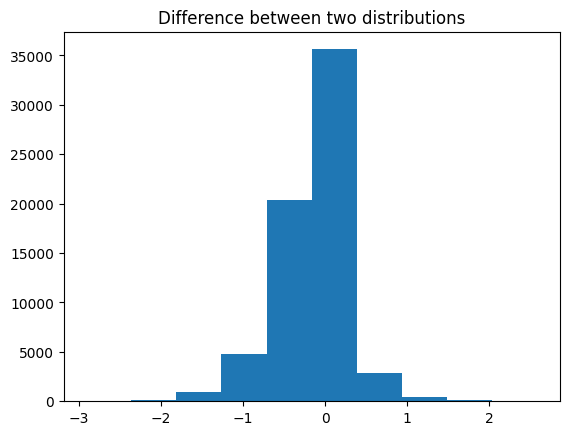

In [34]:
plt.title("Difference between two distributions")
plt.hist(diff)

In [30]:
import scipy.stats as stats
import pylab
import numpy as np

### QQ plot
- heavy-tailed
- will not assume normal distribution
- The reason might be because we dropped the neutral happiness words

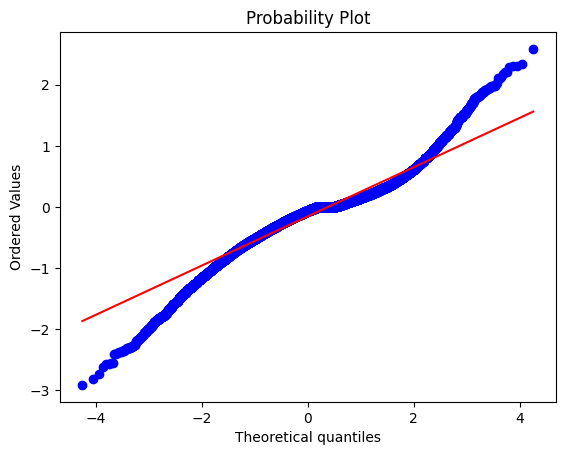

In [31]:
stats.probplot(diff, dist="norm", plot=pylab)
pylab.show()